In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix


In [64]:
digits = load_digits()

In [65]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [66]:
#spliting dataset
xtrain,xtest, ytrain,ytest = train_test_split(digits.data, digits.target, test_size=.25, random_state=0)

In [67]:
#defining model
model = RandomForestClassifier(n_estimators=100)
model.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [68]:
#score of the model
model.score(xtest,ytest)

0.98

In [69]:
#predictin with test data
predicted = model.predict(xtest)

# Confusion Matrix

In [70]:
#very simple confusion matrix
cf_matrix = confusion_matrix(ytest, predicted)
print(cf_matrix)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 43  0  0  0  0  0  0  0  0]
 [ 1  0 42  0  0  0  0  0  0  1]
 [ 0  0  0 45  0  0  0  0  0  0]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  0  0  0  0  0  0 48  0  0]
 [ 0  1  0  1  0  0  0  1 45  0]
 [ 0  0  0  0  0  1  0  0  0 46]]


The output is meaningful but looks like absolute garbage.                                                              
We can make it beautiful with annot parameter and sns.heatmap

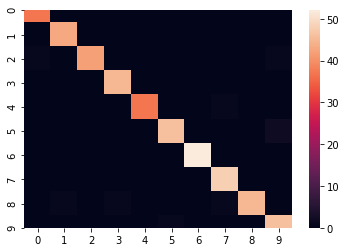

In [71]:
#without annot parameter
cf_matrix = sns.heatmap(confusion_matrix(ytest, predicted))

without annot parameter data will not print, for this we can't see how many mistakes is done and how many        
predicted correctly.

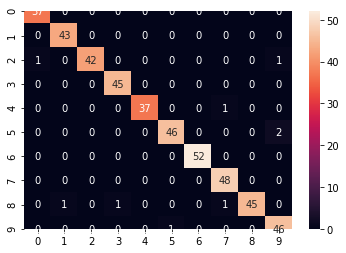

In [72]:
#with annot parameter
cf_matrix = sns.heatmap(confusion_matrix(ytest, predicted), annot=True)

Now it looks like standard than previous figure

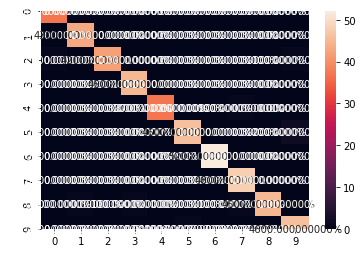

In [73]:
#changing fmt
cf_matrix = sns.heatmap(confusion_matrix(ytest,predicted), annot=True, fmt='0.9%')

Text(79.60000000000001, 0.5, 'Predicted data')

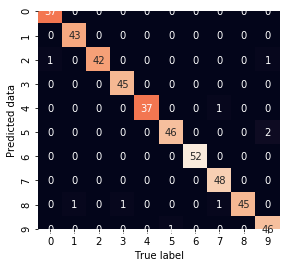

In [74]:
#finally printing
sns.heatmap(confusion_matrix(ytest,predicted), square=True, annot=True, fmt='d', cbar=False,
           xticklabels=digits.target_names,
           yticklabels=digits.target_names)

plt.xlabel('True label')
plt.ylabel('Predicted data')